In [1]:
# Dimitrios Bakalis, A.M : 3033

import pandas as pd 
from pandas import DataFrame

import numpy as np

import sklearn
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import sklearn.metrics as metrics
import sklearn.cluster as sk_cluster

import seaborn as sns

import matplotlib.pyplot as plt

import time

import math
import operator
import json 
import random
import nltk

In [2]:
xls = pd.ExcelFile('lox_pchembl_training.xlsx')

In [3]:
df_regression_LOX = pd.read_excel(xls, 'molecular_descriptors_LOX_with_')
df_regression_LOX.head(5)

,Title,pChEMBL Value,M,First Zagreb,First Zagreb index by valence vertex degrees,Second Zagreb,Second Zagreb index by valence vertex degrees,Polarity,Narumi Simple Topological,Narumi Harmonic Topological,...,#noncon,#nonHatm,Jm,Unnamed: 287,Unnamed: 288,Unnamed: 289,Unnamed: 290,Unnamed: 291,Unnamed: 292,Unnamed: 293
0,CHEMBL17775,4.0,0.018316,94,224.000,94,180.000,23,14.674,1.756,...,0.0,24.0,0.422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CHEMBL17775,4.0,0.018316,94,224.000,94,180.000,23,14.674,1.756,...,0.0,24.0,0.121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CHEMBL27410,4.0,0.018316,70,173.605,80,176.111,19,9.940,1.909,...,3.0,14.0,0.791,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CHEMBL464006,4.0,0.018316,172,462.000,207,480.000,57,21.501,1.797,...,1.0,31.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CHEMBL164332,4.0,0.018316,98,164.000,103,143.000,21,15.079,1.840,...,3.0,23.0,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_regression_train = df_regression_LOX.head(8182)        # we keep the compounds for the training

In [5]:
train_data_list = df_regression_train.values.tolist()

i=-1
for compound in train_data_list:
    i+=1
    train_data_list[i]=compound[3:-7]                     # we keep only the features from our dataset

train_data_array = np.array(train_data_list) 
train_data_array = np.nan_to_num(train_data_array)        # we replace the Nan values with zeros  

In [6]:
print("train data shape", train_data_array.shape)

train data shape (8182, 284)


In [7]:
target = df_regression_train['pChEMBL Value'].tolist()
print("target size", len(target))

target size 8182


Linear Regressor
****Results****
train accuracy score 0.6170330371697147
test accuracy score  0.6208602913793146
--- 1.1749968528747559 seconds ---
Gradient Boosting Regressor
****Results****
train accuracy score 0.7103146134807958
test accuracy score  0.7048775073671276
--- 187.22940063476562 seconds ---
Decision Tree Regressor
****Results****
train accuracy score 0.7042269831162249
test accuracy score  0.7220466995603632
--- 7.7078375816345215 seconds ---
Random Forest Regressor
****Results****
train accuracy score 0.8412762229389351
test accuracy score  0.8512308628432613
--- 473.3900656700134 seconds ---
Support Vector Regressor
****Results****
train accuracy score 0.22773203978257534
test accuracy score  0.24949508239521578
--- 56.05098748207092 seconds ---


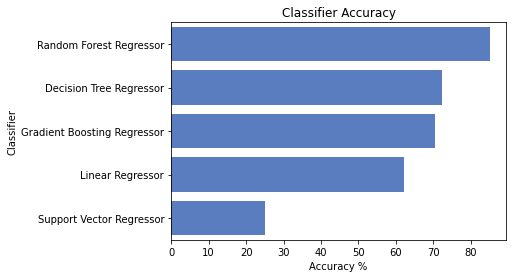

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

import time

classifiers = [
    LinearRegression(),
    GradientBoostingRegressor(),  
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    svm.SVR()
    ]  

names = ["Linear Regressor", "Gradient Boosting Regressor", "Decision Tree Regressor",
        "Random Forest Regressor", "Support Vector Regressor"]

X_train, X_test, y_train, y_test = train_test_split(train_data_array, target, test_size=0.3,random_state=109) # 70% of our data for training and the rest 30% for testing

log_cols=["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

print("==============================")

name_flag = -1
for classifier in classifiers: 
    name_flag+=1

    start_time = time.time()

    scores = cross_val_score(classifier, X_train, y_train, cv=10)  # 10-k fold validation
    train_acc = scores.mean()                                      # we calculate the mean train accuracy score

    print(names[name_flag])
    print('****Results****')

    print("train accuracy score",train_acc)

    classifier.fit(X_train, y_train)

    test_acc = classifier.score(X_test, y_test)

    print("test accuracy score ", test_acc)

    log_entry = pd.DataFrame([[names[name_flag], test_acc*100]], columns=log_cols)
    log = log.append(log_entry)

    print("--- %s seconds ---" % (time.time() - start_time))

    print("==============================")

log = log.sort_values(by=['Accuracy'], ascending=False)

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

In [9]:
X = df_regression_LOX.head(8182) 
X = X.fillna(0)    

data = X.iloc[:,3:-7]                                 # independent columns

labels = df_regression_train['pChEMBL Value']         # labels

print("data shape", data.shape)
print("labels shape", labels.shape)

data shape (8182, 284)
labels shape (8182,)


In [10]:
from sklearn.preprocessing import MinMaxScaler
from ITMO_FS.filters.univariate import chi2_measure

labels = np.array(labels)

scaler = MinMaxScaler(feature_range=(0,1))                 # we scale our data to values between 0-1 to eliminate the negative values
data_scaled = scaler.fit_transform(data)

scores = chi2_measure(data_scaled, labels)                 # Chi^2

column_names = data.columns

chi2_measure_dict = {}
i=-1
for score in scores:
    i+=1
    chi2_measure_dict[column_names[i]] = score

sorted_chi2_measure_dict = dict( sorted(chi2_measure_dict.items(),
                           key=lambda item: item[1],
                           reverse=True))

df_chi2_measure = pd.DataFrame.from_dict(sorted_chi2_measure_dict, orient='index') 

print(df_chi2_measure.head(15))

                                                 0
Ring Count 4                            814.471144
Chirality count                         671.376254
Ring Count 3                            632.137804
Ring Count 7                            587.965891
Topological charge index of order 8     512.207681
Topological charge index of order 7     472.209183
Ring Count 5                            455.424140
Topological charge index of order 9     434.473388
Topological charge index of order 6     400.125868
Topological charge index of order 10    396.370085
Topological charge index of order 5     389.032593
Molecular electrotopological variation  371.088423
Topological charge index of order 3     355.870691
Total structure connectivity            273.159065
E-state topological parameter           265.402348


In [11]:
from ITMO_FS.filters.univariate import information_gain

labels = np.array(labels)

scores = information_gain(data_scaled, labels)                 # Information Gain

column_names = data.columns

information_gain_dict = {}
i=-1
for score in scores:
    i+=1
    information_gain_dict[column_names[i]] = score

sorted_information_gain_dict = dict( sorted(information_gain_dict.items(),
                           key=lambda item: item[1],
                           reverse=True))

df_information_gain = pd.DataFrame.from_dict(sorted_information_gain_dict, orient='index') 

print(df_information_gain.head(15))

                                                           0
NDDO Heat of Formation                              5.481561
glob                                                5.477239
volume                                              5.476425
SASA                                                5.470702
QPPCaco                                             5.465023
PISA                                                5.463923
LUMO Energy                                         5.456243
HOMO Energy                                         5.452278
FISA                                                5.448273
PSA                                                 5.443265
Wiener-type index from electronegativity weight...  5.439734
Wiener-type index from mass weighted distance m...  5.439564
Wiener-type index from Z weighted distance matr...  5.437912
Wiener-type index from polarizability weighted ...  5.435151
Wiener-type index from van der waals weighted d...  5.434812


In [12]:
from ITMO_FS.filters.univariate import gini_index

labels = np.array(labels)

scores = gini_index(data, labels)      # Gini Index

column_names = data.columns

gini_index_dict = {}
i=-1
for score in scores:
    i+=1
    gini_index_dict[column_names[i]] = score

sorted_gini_index_dict = dict( sorted(gini_index_dict.items(),
                           key=lambda item: item[1],
                           reverse=True))

df_gini_index = pd.DataFrame.from_dict(sorted_gini_index_dict, orient='index') 

print(df_gini_index.head(15))

                                                 0
Total structure connectivity              0.488515
Ring Count 4                              0.393468
#amidine                                  0.315695
#rtvFG                                    0.309719
#amide                                    0.250937
Chirality count                           0.249731
PEOE12                                    0.231161
PEOE14                                    0.200173
CNS                                       0.184999
PEOE1                                     0.152062
Average valence connectivity index chi-5  0.152007
Average connectivity index chi-1          0.151404
Average valence connectivity index chi-4  0.149491
PEOE4                                     0.148996
PEOE2                                     0.146898


C:\Users\Dimitris\anaconda3\lib\site-packages\ITMO_FS\filters\univariate\measures.py:144: RuntimeWarning: invalid value encountered in true_divide
  cum_x = np.cumsum(X / np.linalg.norm(X, 1, axis=0), axis=0)


In [13]:
from ITMO_FS.filters.univariate import pearson_corr

labels = np.array(labels)

scores = pearson_corr(data, labels)      # Pearson Correlation Coefficient

column_names = data.columns

pearson_corr_dict = {}
i=-1
for score in scores:
    i+=1
    pearson_corr_dict[column_names[i]] = score

sorted_pearson_corr_dict = dict( sorted(pearson_corr_dict.items(),
                           key=lambda item: item[1],
                           reverse=True))

df_pearson_corr = pd.DataFrame.from_dict(sorted_pearson_corr_dict, orient='index') 

print(df_pearson_corr.head(15))

                                                  0
Number of ring systems                     0.435985
ALOGP4                                     0.393468
Sum of topological distances between N..N  0.362298
Atoms in Ring System                       0.356500
#ringatoms                                 0.355774
Ring perimeter                             0.354588
ALOGP7                                     0.346910
Variation                                  0.336105
Bonds in Ring System                       0.328298
Topological diameter                       0.327399
Radial centric                             0.322131
#in56                                      0.320903
reciprocal distance Randic-type index      0.319531
PEOE3                                      0.319489
Topological radius                         0.316624


In [14]:
from ITMO_FS.filters.univariate import f_ratio_measure

labels = np.array(labels)

scores = f_ratio_measure(data, labels)      # Fisher Ratio

column_names = data.columns

f_ratio_dict = {}
i=-1
for score in scores:
    i+=1
    f_ratio_dict[column_names[i]] = score

sorted_f_ratio_dict = dict( sorted(f_ratio_dict.items(),
                           key=lambda item: item[1],
                           reverse=True))

df_f_ratio = pd.DataFrame.from_dict(sorted_f_ratio_dict, orient='index') 

print(df_f_ratio.head(15))

                                                   0
Sum of topological distances between S..Br  6.896198
Sum of topological distances between F..Br  5.003308
Mean topological charge index of order 3    2.749194
Average valence connectivity index chi-4    2.398071
Sum of topological distances between O..Cl  2.051005
Sum of topological distances between O..Br  1.981006
Topological charge index of order 8         1.218369
Topological charge index of order 6         1.180402
Topological charge index of order 7         1.154305
Sum of topological distances between N..Br  1.115773
Chirality count                             1.107946
Topological charge index of order 9         1.107678
Topological charge index of order 3         1.077726
Topological charge index of order 5         1.074307
Topological charge index of order 10        1.046227


In [22]:
df_regression_test = df_regression_LOX.tail(24)        # we keep the compounds for testing

In [23]:
test_data_list = df_regression_test.values.tolist()

i=-1
for compound in test_data_list:
    i+=1
    test_data_list[i]=compound[3:-7]                   # we keep only the features from our dataset

test_data_array = np.array(test_data_list) 
test_data_array = np.nan_to_num(test_data_array)       # we replace the Nan values with zeros  

In [24]:
print("test data shape",test_data_array.shape)

test data shape (24, 284)


In [25]:
start_time = time.time()

classifier = RandomForestRegressor()

classifier.fit(train_data_array, target)               # we train our model with the tested compounds

prediction = classifier.predict(test_data_array)       # we predict the regression value for our new compounds

print("--- %s seconds ---" % (time.time() - start_time))

--- 66.73400139808655 seconds ---


In [26]:
print(prediction)

[5.6652     6.52475    6.0315     6.2022     6.2162     6.441
 6.0306     6.2081     5.8395     6.2275     6.0068     6.1651
 6.0513     6.1459     5.1275     5.7922     5.861      6.0203
 5.963      5.52006667 5.80673831 6.3388     6.085      5.7964    ]


In [27]:
real_list = [6, 5.52, 5.4, 5.3, 5.22, 5.05, 5, 4.69, 4.92, 4.89, 4.85, 4.82, 4.8, 4.77, 4.74, 4.72, 4.7, 4.66, 4.64, 4.6, 4.59, 4.57, 4.55, 4.54 ]

In [28]:
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print(explained_variance_score(real_list, prediction))
print(r2_score(prediction,real_list))

-0.4009630500569281
-14.955884804266704


In [29]:
X = df_regression_train.iloc[:,3:-7]

X = X.fillna(0)

labels = df_regression_train.iloc[:,1:2]

<ipython-input-30-7c069af07f51>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,labels)


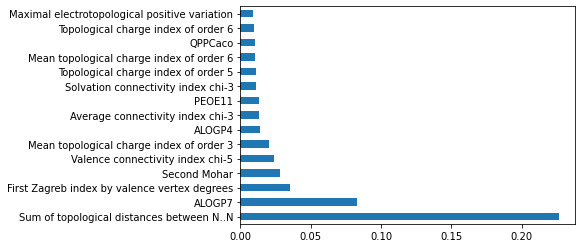

In [30]:
model = RandomForestRegressor()
model.fit(X,labels) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)  # plot graph of feature importances for better visualization
feat_importances.nlargest(15).plot(kind='barh')
plt.show() 